In [1]:
install.packages("kknn")
library(kknn)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(tidyverse)
library(DBI)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [3]:
url <- "https://raw.githubusercontent.com/Ivvvyyan/dsci-group-11/main/StressLevelDataset.csv"
stress <- read_csv(url)
head(stress, n = 3)

Rows: 1100 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (21): anxiety_level, self_esteem, mental_health_history, depression, hea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,⋯,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14,20,0,11,2,1,2,4,2,3,⋯,2,3,2,3,3,2,3,3,2,1
15,8,1,15,5,3,1,4,3,1,⋯,2,1,4,1,5,1,4,5,5,2
12,18,1,14,2,1,2,2,2,2,⋯,2,2,3,3,2,2,3,2,2,1


In [4]:
stress <- stress |>

mutate(stress_level = as_factor(stress_level))|>
mutate(stress_level = fct_recode(stress_level, "Carefree" = "0", "Intermediate" = "1", "Stressful" = "2"))

stress |>
distinct(stress_level)

stress_level
<fct>
Intermediate
Stressful
Carefree


In [5]:
names(stress) <- c("anxiety_level", "self_esteem", "mental_health_history", "depression",
                  "headache", "blood_pressure", "sleep_quality", "breathing_problem",
                  "noise_level", "living_conditions", "safety", "basic_needs", 
                  "academic_performance", "study_load", "teacher_student_relationship", "future_career_concerns",
                  "social_support", "peer_pressure", "extracurricular_activities", "bullying", "stress_level")
head(stress, n=3)

anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,⋯,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
14,20,0,11,2,1,2,4,2,3,⋯,2,3,2,3,3,2,3,3,2,Intermediate
15,8,1,15,5,3,1,4,3,1,⋯,2,1,4,1,5,1,4,5,5,Stressful
12,18,1,14,2,1,2,2,2,2,⋯,2,2,3,3,2,2,3,2,2,Intermediate


In [6]:
#reports the distribution of distinct stress level
num_obs <- nrow(stress)
stress |>
  group_by(stress_level) |>
  summarize(
    count = n(),
    percentage = n() / num_obs * 100
  )

#reports the number of observations in each variable
num_observations <- stress |>
  summarise(across(everything(), ~sum(!is.na(.))))
num_observations

stress_level,count,percentage
<fct>,<int>,<dbl>
Carefree,373,33.90909
Intermediate,358,32.54545
Stressful,369,33.54545


anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,⋯,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1100,1100,1100,1100,1100,1100,1100,1100,1100,1100,⋯,1100,1100,1100,1100,1100,1100,1100,1100,1100,1100


The above tells us that our data does not have any missing (N/A) values. Therefore, we do not have to worry about removing NA values from our dataset!

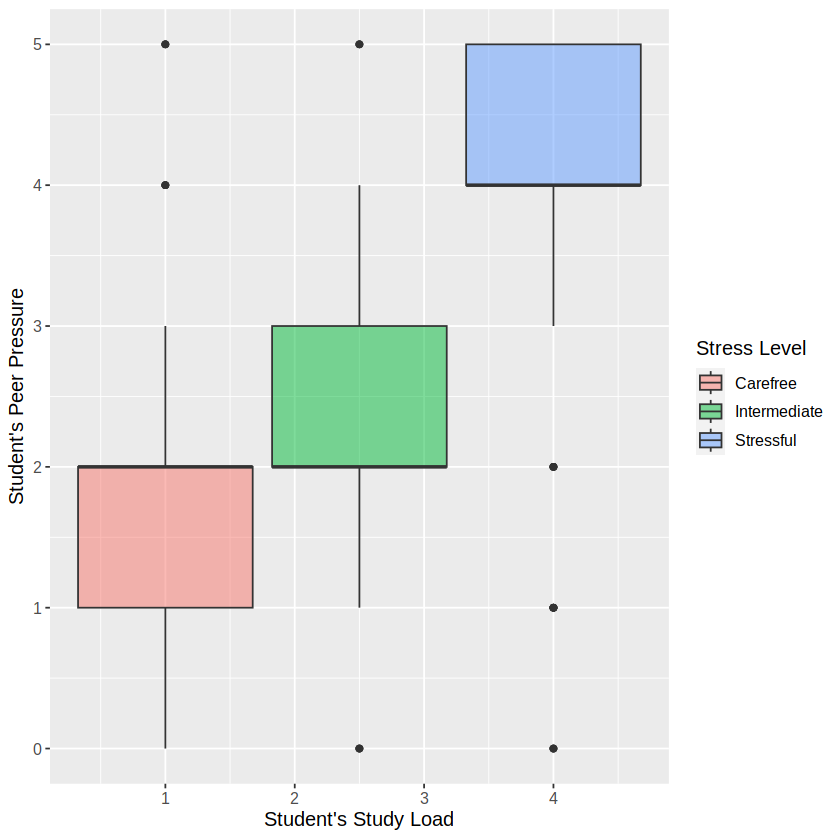

In [7]:
stress_academic <- stress |>
    ggplot(aes (x=study_load, y=peer_pressure, fill=stress_level)) +
    geom_boxplot(alpha = 0.5) +
    labs(x="Student's Study Load", y="Student's Peer Pressure", fill="Stress Level") +
    theme(text = element_text(size=12))

stress_academic

In [8]:
stress_selected <- stress |>
select(study_load, peer_pressure, stress_level)

head(stress_selected)

study_load,peer_pressure,stress_level
<dbl>,<dbl>,<fct>
2,3,Intermediate
4,4,Stressful
3,3,Intermediate
4,4,Stressful
3,5,Intermediate
5,4,Stressful


In [9]:
set.seed(12345)
#Splitting the data into training and testing set.
stress_split <- initial_split(stress_selected, prop = 0.75, strata = stress_level)
stress_training <- training(stress_split)
stress_testing <- testing(stress_split)

In [10]:
stress_vfold <- vfold_cv(stress_training, v=10, strata = stress_level)

In [11]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
set_engine("kknn") |>
set_mode("classification")

In [12]:
stress_recipe <- recipe(stress_level ~ ., data=stress_selected)

In [13]:
set.seed(1234)
k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

knn_results <- workflow() |>
    add_recipe(stress_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = stress_vfold, grid = k_vals) |>
    collect_metrics()

accuracies <- knn_results |>
    filter(.metric == "accuracy")

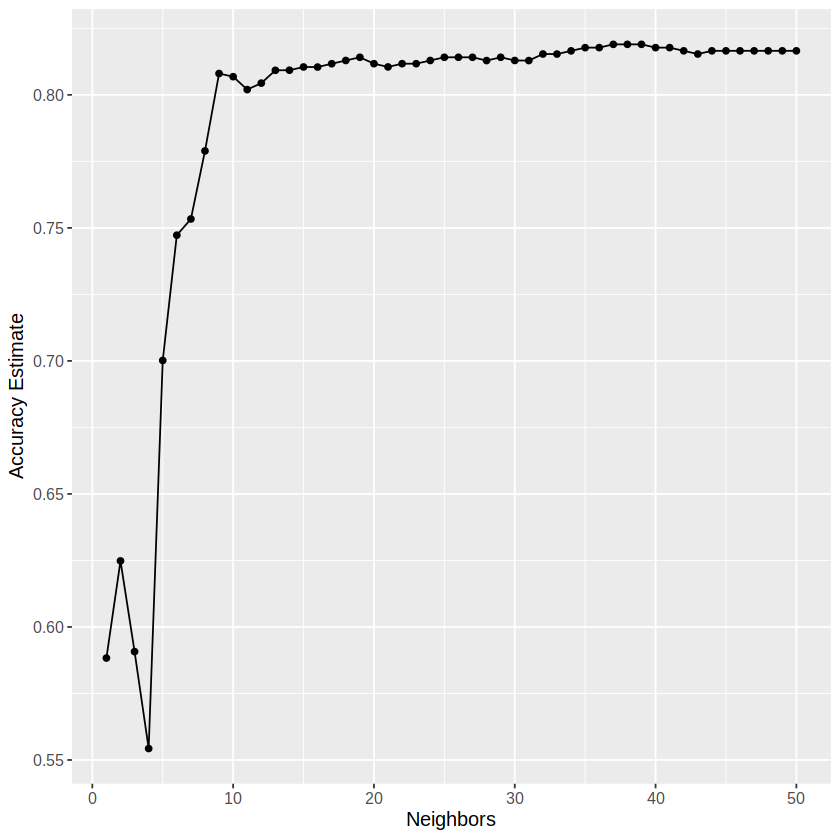

In [15]:
accuracy_vs_k <- ggplot(accuracies, aes(x=neighbors, y=mean)) +
    geom_point() +
    geom_line() +
    labs(x="Neighbors", y="Accuracy Estimate") +
    theme(text=element_text(size=12))

accuracy_vs_k

In [17]:
max_accuracy <- accuracies |>
    slice_max(mean)
max_accuracy

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
37,accuracy,multiclass,0.8189914,10,0.01225077,Preprocessor1_Model37
38,accuracy,multiclass,0.8189914,10,0.01225077,Preprocessor1_Model38
39,accuracy,multiclass,0.8189914,10,0.01184922,Preprocessor1_Model39


In [18]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 39) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_fit <- workflow() |>
    add_recipe(stress_recipe) |>
    add_model(knn_spec) |>
    fit(data=stress_training)

In [19]:
stress_test_predictions <- predict(knn_fit, stress_testing) |>
    bind_cols(stress_testing)

head(stress_test_predictions, n=3)

.pred_class,study_load,peer_pressure,stress_level
<fct>,<dbl>,<dbl>,<fct>
Stressful,4,4,Stressful
Intermediate,3,3,Intermediate
Stressful,5,4,Stressful


In [20]:
stress_accuracy <- stress_test_predictions |>
    metrics(truth=stress_level, estimate= .pred_class) |>
    filter(.metric == "accuracy")

stress_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.7689531


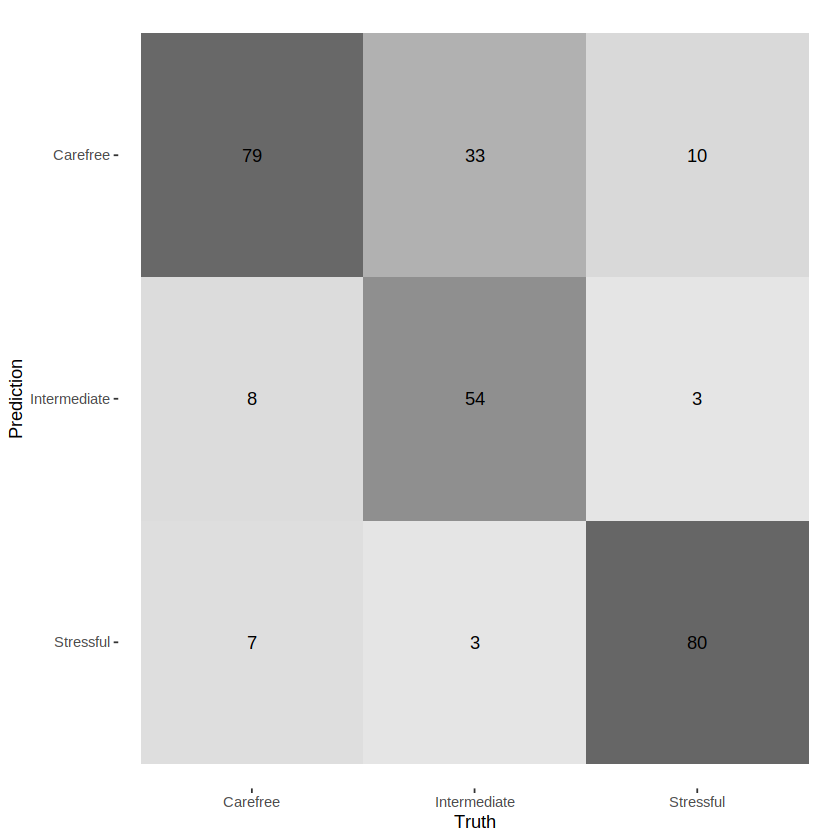

In [21]:
stress_confusion <- stress_test_predictions |>
    conf_mat(truth = stress_level, estimate = .pred_class)
autoplot(stress_confusion, type = "heatmap")

In [22]:
accuracy <- (79+53+81)/(79+53+81+33+10+6+2+9+4)
accuracy

precision_1 <- 79/(79+5+10)
precision_2 <- 53/(53+33+4)
precision_3 <- 81/(81+10+2)

precision <- (precision_1 + precision_2 + precision_3)/3
precision

recall_1 <- 79/(79+33+10)
recall_2 <- 53/(53+5+2)
recall_3 <- 81/(81+10+4)

recall <- (recall_1 + recall_2 + recall_3)/3
recall

metrics_df <- data.frame(
  Metric = c("Accuracy", "Precision", "Recall"),
  Value = c(accuracy, precision, recall)
)

metrics_df

[1] 0.7689531

[1] 0.7667607

[1] 0.794502

Metric,Value
<chr>,<dbl>
Accuracy,0.7689531
Precision,0.7667607
Recall,0.7945020
